<a href="https://colab.research.google.com/github/ozakiryota/kaggle/blob/main/digit_recognizer/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downlad and check datasets

Activate Kaggle API

In [69]:
from google.colab import files
import os

jason_path = "/root/.kaggle/kaggle.json"

if not os.path.exists(jason_path):
    uploaded = files.upload()

    for fn in uploaded.keys():
        print("User uploaded file '{name}' with length {length} bytes".format(
            name=fn, length=len(uploaded[fn])))

    # Then move kaggle.json into the folder where the API expects to find it.
    !mkdir -p /root/.kaggle/ && mv kaggle.json /root/.kaggle/ && chmod 600 /root/.kaggle/kaggle.json

else:
    print(jason_path, "is already exists.")

/root/.kaggle/kaggle.json is already exists.


Download the datasets

In [70]:
!pip install kaggle
!kaggle competitions download -c digit-recognizer
!unzip -n train.csv.zip
!unzip -n test.csv.zip

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  train.csv.zip
Archive:  test.csv.zip


Check the datasets

In [71]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
# df = pd.read_csv("/content/test.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(784,)
(28, 28)


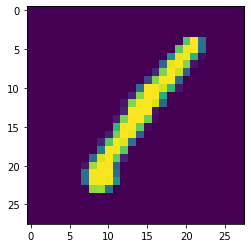

In [72]:
import matplotlib.pyplot as plt

img = df.drop(["label"], axis=1).values[0]
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

plt.imshow(img)
plt.show()

# Fuctions and class

In [73]:
import pandas as pd

def makeDataList(csv_path):
    datalist = pd.read_csv(csv_path)

    return datalist

In [74]:
## TEST
datalist = makeDataList("/content/train.csv")
print("datalist.columns =", datalist.columns)
print("datalist.values[0] =", datalist.values[0])
print(datalist)

datalist.columns = Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
datalist.values[0] = [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250
 253  93  

In [75]:
## TEST
from sklearn.model_selection import train_test_split

train_datalist, val_datalist = train_test_split(datalist, test_size=0.1, random_state=1234, shuffle=True)
print(train_datalist)
print(val_datalist)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
10037      5       0       0       0  ...         0         0         0         0
13376      4       0       0       0  ...         0         0         0         0
13038      3       0       0       0  ...         0         0         0         0
3805       6       0       0       0  ...         0         0         0         0
3464       2       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
32399      9       0       0       0  ...         0         0         0         0
17048      7       0       0       0  ...         0         0         0         0
23924      9       0       0       0  ...         0         0         0         0
34086      2       0       0       0  ...         0         0         0         0
27439      3       0       0       0  ...         0         0         0         0

[37800 rows x 7

In [76]:
import numpy as np

import torch.utils.data as data

class Dataset(data.Dataset):
    def __init__(self, datalist):
        self.datalist = datalist

    def __len__(self):
        return len(self.datalist.values)
    
    def __getitem__(self, index):
        inputs = self.datalist.drop(["label"], axis=1).values[index].astype(np.float32)
        inputs = inputs.reshape(1, 28, 28)
        labels = self.datalist["label"].values[index]
        labels = np.identity(10)[labels]
        return inputs, labels

In [77]:
## TEST
dataset = Dataset(datalist)
print("dataset.__len__() =", dataset.__len__())
print("dataset.__getitem__(index=0)[0] =", dataset.__getitem__(index=0)[0])
print("dataset.__getitem__(index=0)[1] =", dataset.__getitem__(index=0)[1])

dataset.__len__() = 42000
dataset.__getitem__(index=0)[0] = [[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0. 188. 255.  94.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0. 191. 250. 253.  93.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

In [78]:
## TEST
import torch

batch_size = 10
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
batch_itr = iter(dataloader)
inputs, labels = next(batch_itr)

# print("inputs = ", inputs)
print("inputs.size() = ", inputs.size())
print("labels = ", labels)
print("labels.size() = ", labels.size())

inputs.size() =  torch.Size([10, 1, 28, 28])
labels =  tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=torch.float64)
labels.size() =  torch.Size([10, 10])


In [79]:
import torch
from torch import nn

class Network(nn.Module):
    def __init__(self, input_dim, cnn_dim_list, conv_kernel_size, pool_kernel_size, fc_dim_list, dropout_rate):
        super().__init__()

        padding_size = (conv_kernel_size - 1) // 2
        fc_dim_in = cnn_dim_list[-1] * (input_dim // pool_kernel_size**(len(cnn_dim_list) - 1)) * (input_dim // pool_kernel_size**(len(cnn_dim_list) - 1))
        fc_dim_list = [fc_dim_in] + fc_dim_list

        cnn_layer_list = []
        for i in range(len(cnn_dim_list) - 1):
            cnn_layer_list.append(nn.Conv2d(cnn_dim_list[i], cnn_dim_list[i+1], kernel_size=conv_kernel_size, stride=1, padding=padding_size))
            cnn_layer_list.append(nn.ReLU(inplace=True))
            cnn_layer_list.append(nn.MaxPool2d(kernel_size=pool_kernel_size, stride=pool_kernel_size))
        self.cnn = nn.Sequential(*cnn_layer_list)

        fc_layer_list = []
        for i in range(len(fc_dim_list) - 1):
            fc_layer_list.append(nn.Linear(fc_dim_list[i], fc_dim_list[i+1]))
            if i != len(fc_dim_list) - 2:
                fc_layer_list.append(nn.ReLU(inplace=True))
                fc_layer_list.append(nn.Dropout(p=dropout_rate))
        self.fc = nn.Sequential(*fc_layer_list)

    def forward(self, x):
        x = self.cnn(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [80]:
## TEST
net = Network(
    input_dim = dataset.__getitem__(index=0)[0].shape[1],
    cnn_dim_list = [1, 10, 30],
    conv_kernel_size = 3,
    pool_kernel_size = 2,
    fc_dim_list = [64, 10],
    dropout_rate = 0.1
)
print(net)
outputs = net(inputs)
print("outputs = ", outputs)
print("outputs.size() =", outputs.size())

Network(
  (cnn): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=1470, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)
outputs =  tensor([[ -1.3282,   8.3762,  -5.1443,   5.1757, -13.1083,  -4.2586,   0.9370,
           2.7399,   4.3848,  -5.1787],
        [ -3.6764,  10.3648,  -7.8931,   8.8754,  -7.1109,  -3.2518,  -2.3652,
           8.1634,  13.7302,   0.8034],
        [ -9.5491,  10.8307,  -8.3093,  15.6648, -13.3674,  -3.2307,  -2.9822,
           5.9623,   5.3385,  -2.9263],
        [ 

# Training

In [ ]:
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.optim as optim

class Trainer:
    def __init__(self, csv_path, num_epochs, batch_size, lr, save_weights_path):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("self.device = ", self.device)
        
        datalist = makeDataList(csv_path)
        train_datalist, val_datalist = train_test_split(datalist, test_size=0.1, random_state=1234, shuffle=True)
        train_dataset = Dataset(train_datalist)
        val_dataset = Dataset(val_datalist)
        train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
        val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
        
        self.num_epochs = num_epochs
        self.dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}
        self.net = Network(
            input_dim = train_dataset.__getitem__(index=0)[0].shape[1],
            cnn_dim_list = [1, 10, 30],
            conv_kernel_size = 3,
            pool_kernel_size = 2,
            fc_dim_list = [64, 10],
            dropout_rate = 0.1
        )
        self.net.to(self.device)
        print(net)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr)

    def train(self):
        ## time
        start_clock = time.time()
        ## record
        record_train_loss = []
        record_val_loss = []
        record_loss_dict = {"train": [], "val": []}
        min_loss_epoch = 0.0
        ## loop
        for epoch in range(self.num_epochs):
            if epoch == 0 or not (epoch+1) % (num_epochs // 10):
                print("----------")
                print("Epoch {}/{}".format(epoch+1, self.num_epochs))
            ## phase
            for phase in ["train", "val"]:
                ## setting
                if phase == "train":
                    self.net.train()
                else:
                    self.net.eval()
                ## record
                loss_epoch = 0.0
                num_inputs_epoch = 0
                for inputs, labels in self.dataloaders_dict[phase]:
                    inputs = inputs.to(self.device)
                    labels = labels.to(self.device)
                    ## reset gradient
                    self.optimizer.zero_grad()
                    ## switch computing gradient
                    with torch.set_grad_enabled(phase == "train"):
                        ## forward
                        outputs = self.net(inputs)
                        loss = self.criterion(outputs, labels)
                        ## backward
                        if phase == "train":
                            loss.backward()
                            self.optimizer.step()
                    ## add loss
                    loss_epoch += loss.item() * inputs.size(0)
                    num_inputs_epoch += inputs.size(0)
                ## average loss
                loss_epoch = loss_epoch / num_inputs_epoch
                record_loss_dict[phase].append(loss_epoch)
                if epoch == 0 or not (epoch+1) % (num_epochs // 10):
                    print("{} Loss: {:.4f}".format(phase, loss_epoch))
            ## save
            if epoch == 0 or record_loss_dict["val"][-1] < min_loss_epoch:
                min_loss_epoch = record_loss_dict["val"][-1]
                torch.save(self.net.state_dict(), save_weights_path)
        ## time
        mins = (time.time() - start_clock) // 60
        secs = (time.time() - start_clock) % 60
        print ("training time: ", mins, " [min] ", secs, " [sec]")
        ## graph
        self.showGraph(record_loss_dict)

    def showGraph(self, record_loss_dict):
        graph = plt.figure()
        plt.plot(range(len(record_loss_dict["train"])), record_loss_dict["train"], label="Training")
        plt.plot(range(len(record_loss_dict["val"])), record_loss_dict["val"], label="Validation")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("loss: train=" + str(record_loss_dict["train"][-1]) + ", val=" + str(record_loss_dict["val"][-1]))
        plt.show()


csv_path = "/content/train.csv"
num_epochs = 200
batch_size = 100
lr = 0.01
save_weights_path = "/content/weights.pth"

trainer = Trainer(csv_path, num_epochs, batch_size, lr, save_weights_path)
trainer.train()

self.device =  cpu
Network(
  (cnn): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(10, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=1470, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)
----------
Epoch 1/200
train Loss: 1.0136
val Loss: 0.2675


# Evaluation

In [ ]:
import time
import pandas as pd

import torch

class Evaluator:
    def __init__(self, train_csv_path, eval_csv_path, weights_path, save_csv_path):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("self.device = ", self.device)

        #self.csv_path = csv_path
        self.save_csv_path = save_csv_path
        self.datalist = self.makeEvalDataList(train_csv_path, eval_csv_path)

        self.net = Network([self.datalist.shape[1]-1, 256, 128, 64, 1], dropout_rate=0.1)
        self.net.to(self.device)
        if torch.cuda.is_available():
            loaded_weights = torch.load(weights_path)
            print("Weights have been loaded [GPU -> GPU]:", weights_path)
        else:
            loaded_weights = torch.load(weights_path, map_location={"cuda:0": "cpu"})
            print("Weights have been loaded [GPU -> CPU]:", weights_path)
        self.net.load_state_dict(loaded_weights)
        print(self.net)

    def makeEvalDataList(self, train_csv_path, eval_csv_path):
        train_datalist = pd.read_csv(train_csv_path)
        eval_datalist = pd.read_csv(eval_csv_path)
        datalist = pd.concat([train_datalist, eval_datalist], ignore_index=True)
        datalist = pd.get_dummies(datalist)
        datalist = datalist.loc[datalist["SalePrice"].isna()]
        datalist = datalist.drop(["SalePrice"], axis=1)
        datalist = datalist.fillna(-1)
        return datalist

    def evaluate(self):
        ## time
        start_clock = time.time()
        ## setting
        self.net.eval()
        ## ndarray -> tensor
        inputs = torch.from_numpy(self.datalist.drop(["Id"], axis=1).values.astype(np.float32))
        inputs = inputs.to(self.device)
        ## forward
        with torch.no_grad():
            outputs = self.net(inputs)
            outputs.squeeze_(1)
        ## save
        self.writeCSV(outputs)
        ## time
        mins = (time.time() - start_clock) // 60
        secs = (time.time() - start_clock) % 60
        print ("evaluation time: ", mins, " [min] ", secs, " [sec]")

    def writeCSV(self, outputs):
        result_df = pd.DataFrame({"Id": self.datalist["Id"].values, "SalePrice": outputs.cpu().detach().numpy()})
        result_df.to_csv(self.save_csv_path, index=False)
        print(result_df)


train_csv_path = "/content/train.csv"
eval_csv_path = "/content/test.csv"
weights_path = "/content/weights.pth"
save_csv_path = "/content/submission.csv"

evaluator = Evaluator(train_csv_path, eval_csv_path, weights_path, save_csv_path)
evaluator.evaluate()

# Submission

In [ ]:
import sys

print("Submit the file? (y/n)")
ans = input()
while ans != "y" and ans != "n":
    print("Type 'y' or 'n'")
    ans = input()
if ans == "y":
    !kaggle competitions submit -c digit-recognizer -f submission.csv -m "digit_recognizer.ipynb"